# 7.5 ERROR ANALYSIS (ASSESSMENT)
1. Use forward-, central-, and extrapolated-difference algorithms to differentiate
the functions $\cos t$ and $e^t$ at $t = 0.1, 1.,$ and $100.$
    1. Print out the derivative and its relative error $\epsilon$ as functions of $h$. Reduce
the step size $h$ until it equals machine precision $h \approx \epsilon_m$.
    2. Plot $\log_{10} |\epsilon|$ versus $\log_{10}$ $h$ and check whether the number of decimal
places obtained agrees with the estimates in the text.
    3. See if you can identify regions where truncation error dominates at large
$h$ and round-off error at small h in your plot. Do the slopes agree with our
model’s predictions?



C:\Users\ivans\AppData\Local\Temp\ipykernel_7372\1582108595.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_fig.show()
C:\Users\ivans\AppData\Local\Temp\ipykernel_7372\1582108595.py:116: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combined_fig.show()


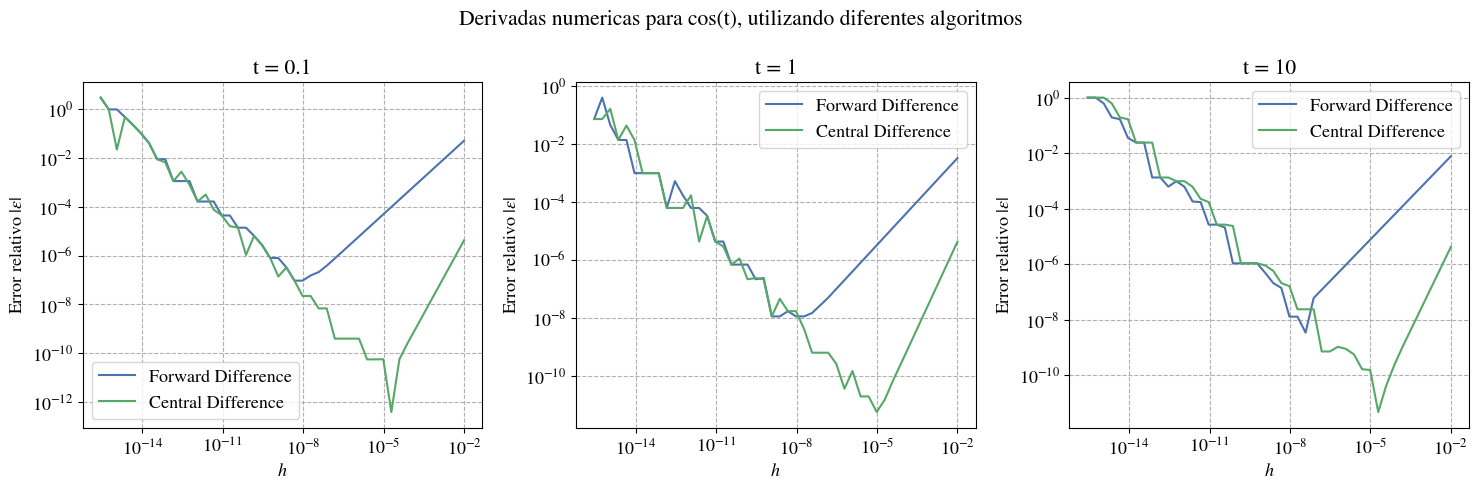

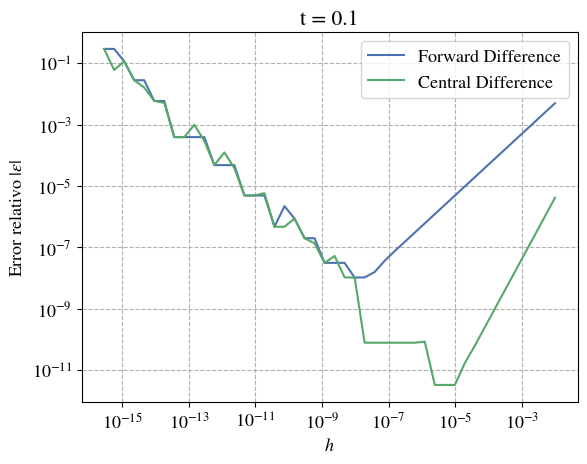

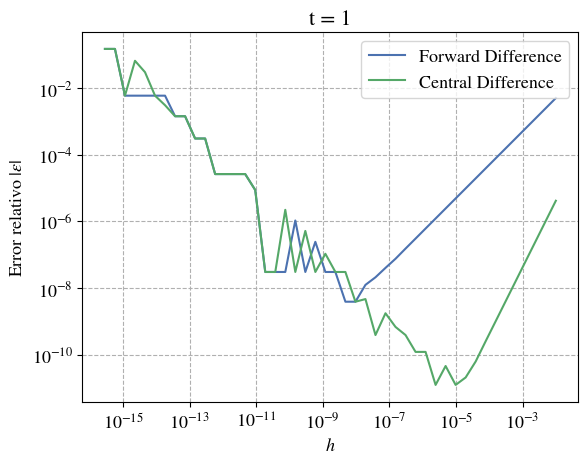

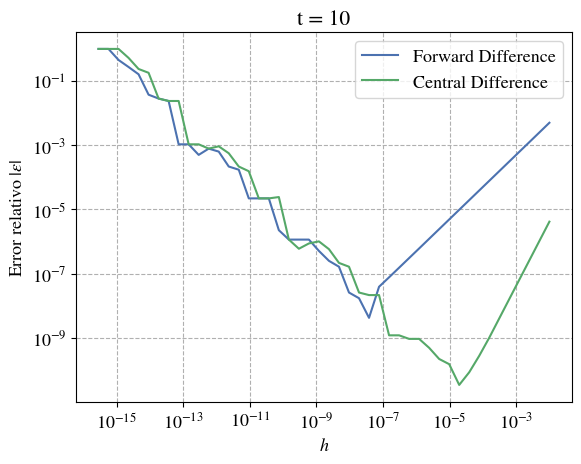

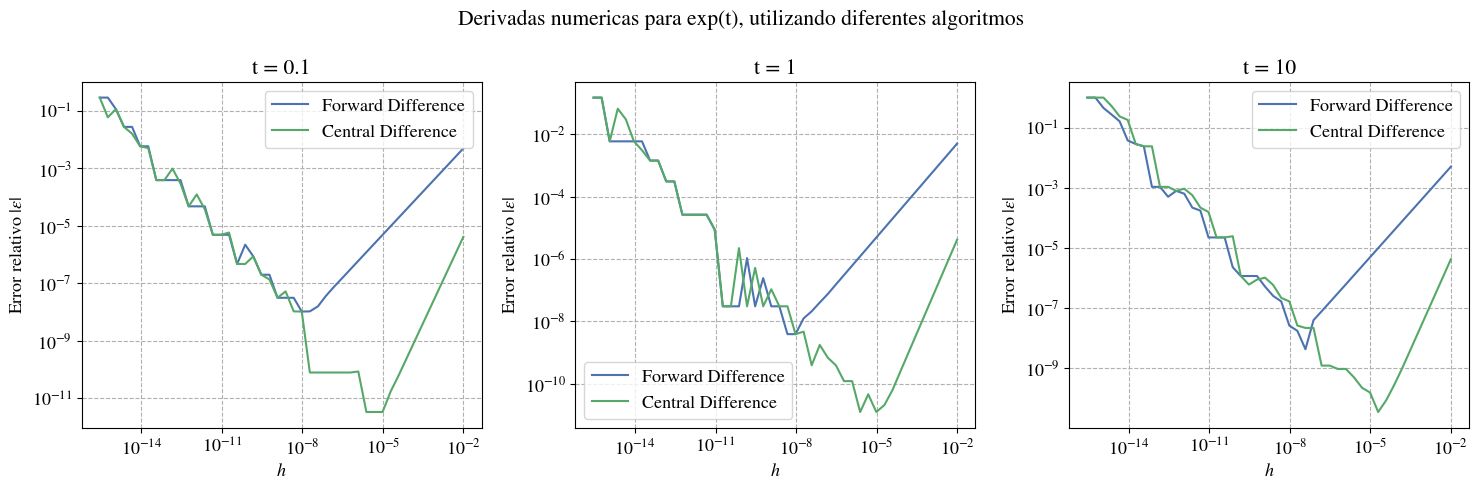

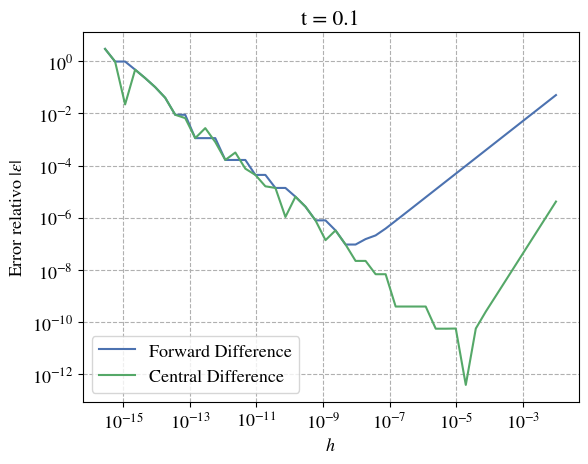

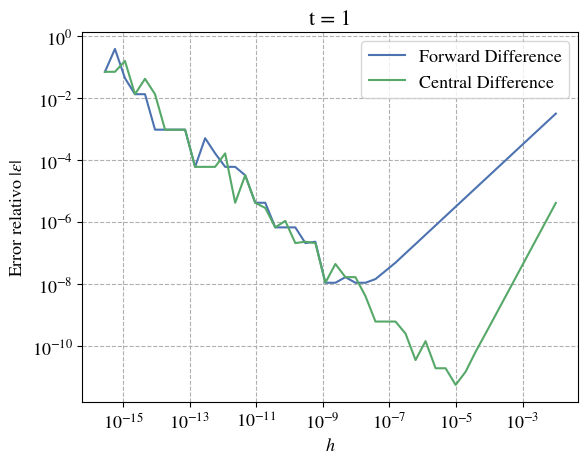

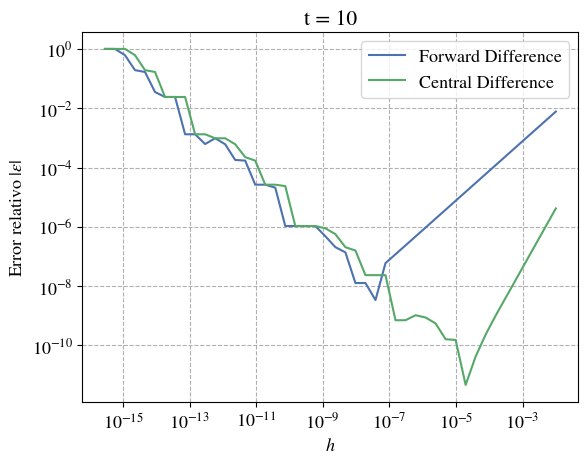

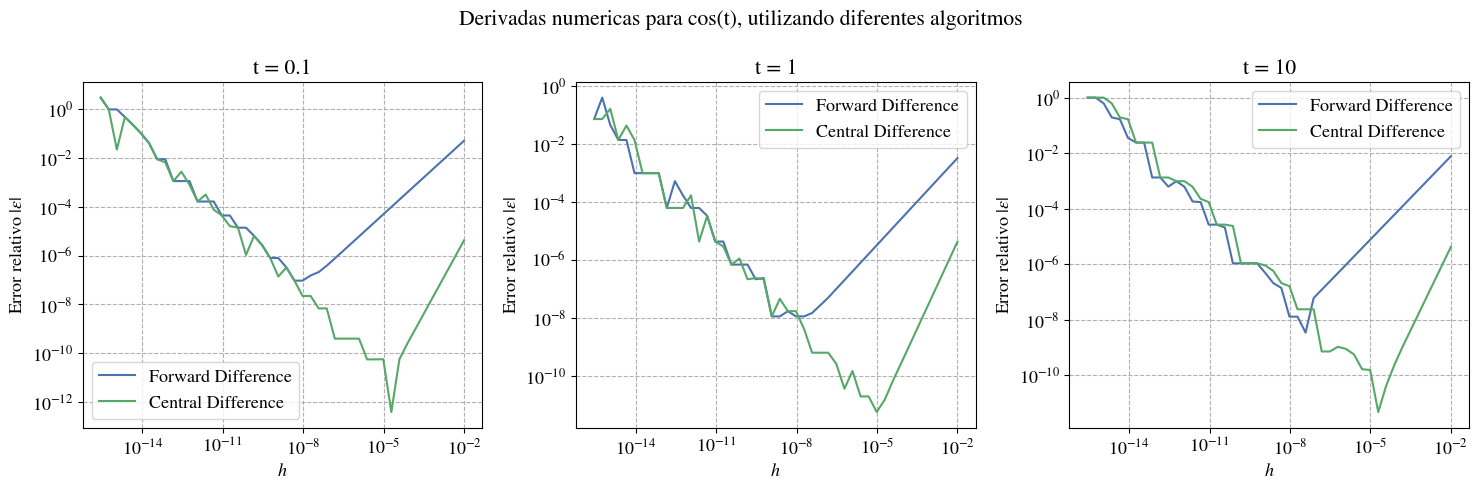

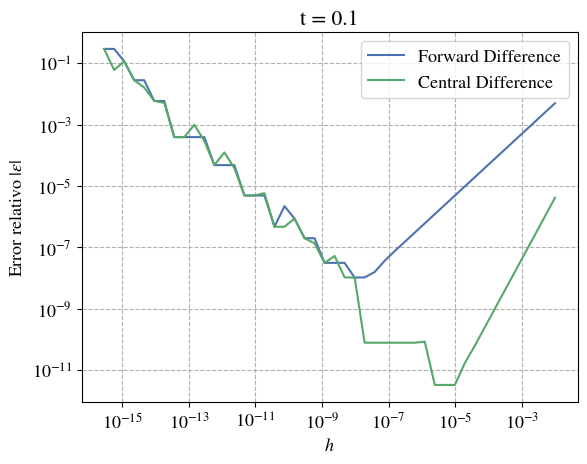

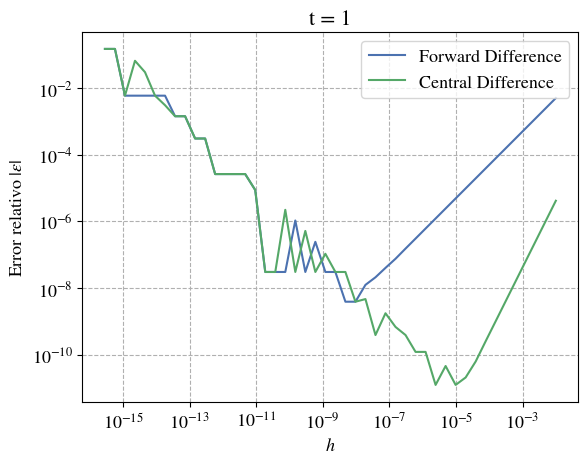

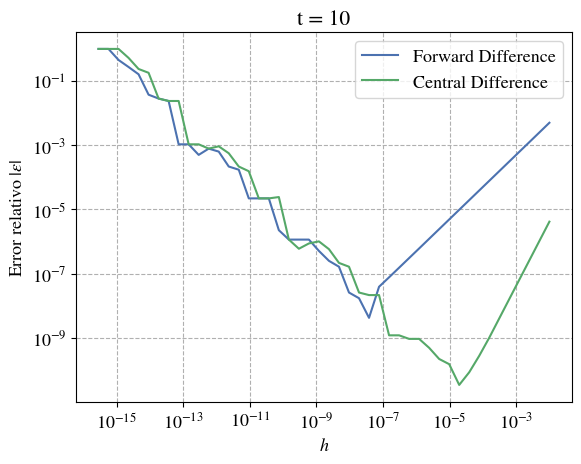

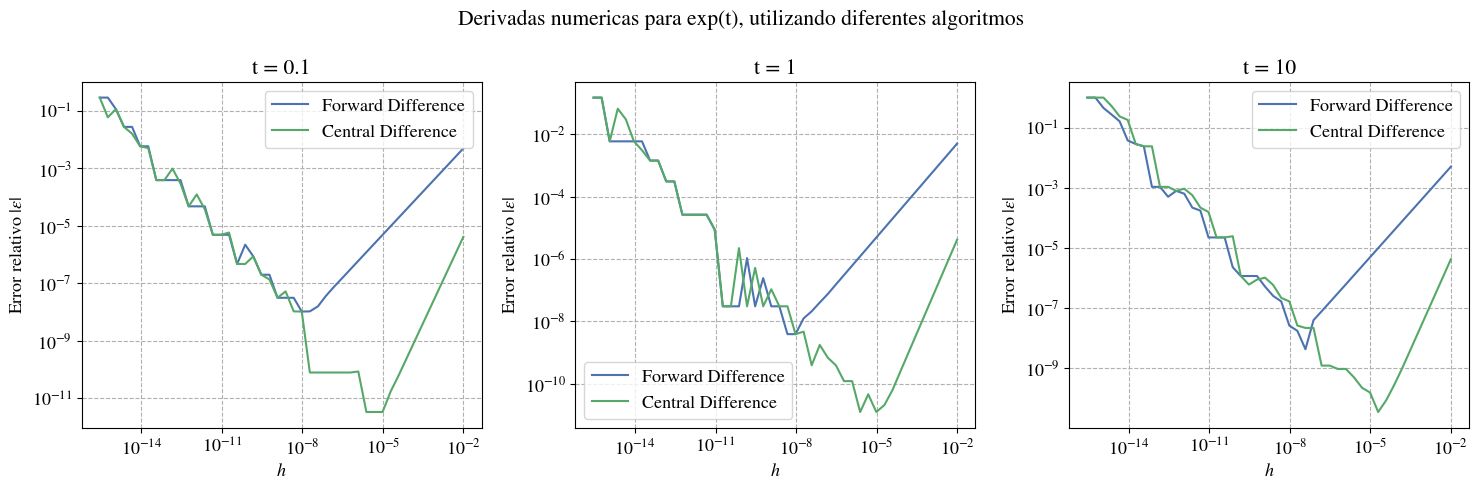

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


# Creo la clase para calcular las derivadas y crear los ploteos
class DifferentiationApproximation: 
    def __init__(self, func, true_derivative, t, h0, num_iterations=100):
        self.func = func
        self.true_derivative = true_derivative
        self.t = t
        self.h0 = h0
        self.num_iterations = num_iterations

    def machineEpsilon(self, f=float): # Calcula el machine error
        machine_epsilon = f(1)
        while f(1) + machine_epsilon != f(1):
            machine_epsilon_last = machine_epsilon
            machine_epsilon = f(machine_epsilon) / f(2)
        return machine_epsilon_last

    def forward_difference(self, h):
        return (self.func(self.t + h) - self.func(self.t)) / h

    def central_difference(self, h):
        return (self.func(self.t + 0.5 * h) - self.func(self.t - 0.5 * h)) / h

    def relative_error(self, approx_derivative, h):
        return abs((self.true_derivative(self.t) - approx_derivative(h)) / self.true_derivative(self.t))

    def calculate(self): 
        h = self.h0

        h_values = []
        error_fd = []
        error_cd = []

        for i in range(self.num_iterations): # Calcula las derivadas para un conjunto de h
            if h > self.machineEpsilon():
                h_values.append(h)

                error_fd.append(self.relative_error(self.forward_difference, h))
                error_cd.append(self.relative_error(self.central_difference, h))

                h = h / 2 #
            else:
                break

        h_values = np.array(h_values)
        error_fd = np.array(error_fd)
        error_cd = np.array(error_cd)

        return h_values, error_fd, error_cd
    
    # Creo las figuras error relativo vs h, y las guardo como variable
    def create_plot(self, h_values, error_fd, error_cd):
        plt.rcParams['mathtext.fontset'] = 'stix'
        plt.rcParams['font.family'] = 'STIXGeneral'
        plt.rcParams.update({'font.size': 13})

        plt.style.use('seaborn-v0_8-deep')

        fig, ax = plt.subplots()

        ax.loglog(h_values, error_fd, label='Forward Difference')
        ax.loglog(h_values, error_cd, label='Central Difference')

        ax.set_xlabel(r'$h$')
        ax.set_ylabel(r'Error relativo $|\epsilon|$')
        ax.set_title(f't = {self.t}')
        ax.legend()
        ax.grid(True, which="both", ls="--")

        return fig


def final_deployment(func, dx, nombre): # Parametros, funcion, derivada exacta, y nombre de la funcion como string
    figures = []

    for i in [0.1, 1, 10]: # Para cada tiempo solicitado creo un objeto
        diff = DifferentiationApproximation(func, dx, i, 0.01) 
        h_values, error_fd, error_cd = diff.calculate() # Calculo los errores para h
        fig = diff.create_plot(h_values, error_fd, error_cd) # Creo las figuras
        figures.append(fig) # Y las agrego a una lista

    def combine_figures(figures): # Esto crea una figura conjunta con las 3 figuras
        combined_fig = plt.figure(figsize=(15, 5))

        ax1 = combined_fig.add_subplot(1, 3, 1)
        ax2 = combined_fig.add_subplot(1, 3, 2)
        ax3 = combined_fig.add_subplot(1, 3, 3)

        def transfer_figure(fig, ax):
            for orig_ax in fig.axes:
                for line in orig_ax.get_lines():
                    ax.loglog(line.get_xdata(), line.get_ydata(), label=line.get_label())
                ax.set_title(orig_ax.get_title())
                ax.set_xlabel(orig_ax.get_xlabel())
                ax.set_ylabel(orig_ax.get_ylabel())
                ax.legend()
                ax.grid(True, which="both", ls="--")

        transfer_figure(figures[0], ax1)
        transfer_figure(figures[1], ax2)
        transfer_figure(figures[2], ax3)

        combined_fig.suptitle(f"Derivadas numericas para {nombre}, utilizando diferentes algoritmos")

        plt.tight_layout()

        return combined_fig

    combined_fig = combine_figures(figures)

    combined_fig.show()


def func_cos(t):
    return np.cos(t)


def dx_cos(t):
    return -np.sin(t)


def exp(t):
    return np.exp(t)


final_deployment(func_cos, dx_cos, "cos(t)")
final_deployment(np.exp, np.exp, "exp(t)")


### Interpretación del grafico

1. Para valores grandes de $h$, se muetran errores relativos considerables. Esto se debe al error de truncamiento que es grande cuando $h$ es grande.

\begin{equation*}
    \epsilon = \frac{y^{'}h}{2}
\end{equation*}

2. En algún punto de la gráfica, el error relativo alcanza un valor mínimo. Este punto representa el mejor compromiso entre el error de truncamiento y el error de redondeo.
3. Después de alcanzar el mínimo, el error relativo comienza a aumentar nuevamente a medida que $h$ sigue disminuyendo. Esto ocurre porque el error de redondeo, que se debe a las limitaciones de precisión numérica en la máquina, empieza a dominar.